<a href="https://colab.research.google.com/github/GarimaChopra/AML/blob/main/Project1_ForestFires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:

# Using Pandas for importing data from file 
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sbn

# Using numpy for to operate on multidimentional arrays.
import numpy as np

In [242]:
# Read raw file from github into a dataframe
# forestfires.csv: predict the burned area of forest fires using various factors
df = pd.read_csv('https://raw.githubusercontent.com/GarimaChopra/AML/main/forestfires.csv')


In [243]:
# display the dataframe 
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [244]:
# the size of the dataset
df.shape

(517, 13)

In [245]:
# statistical details of dataset
df.describe()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [246]:
#  print the full summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


**Problem Statement :**
- Create a simple linear regression model to understand the relationship between Area (the burned area of the forest) and the attribute Temp.
- Plot the 2D data (scatter plot) along with the discovered model
- Use the 80-20 holdout technique to test the validity of the model and report on the obtained R2 and MSE values



In [247]:
# importing simple linear regression 
from sklearn import linear_model
lm = linear_model.LinearRegression()



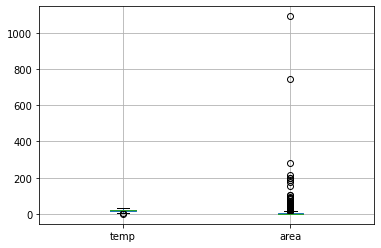

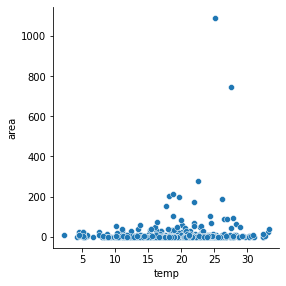

In [248]:
# pre plotting 
# understanding distribution of values
df.boxplot(column=['temp', 'area'])
sbn.pairplot(df, x_vars=['temp'], y_vars='area', height=4, aspect=1, kind='scatter')
plt.show()

In [249]:
#reshape an array by adding an extra dimension
x = np.c_[df['temp']]
y = np.c_[df['area']]

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(-7.413751564770022, 1.072627621060047)

**Linear Model**: Area = -7.413 + 1.072 * temp




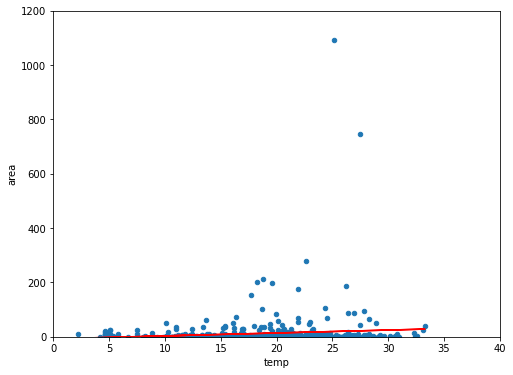

In [250]:
# plot the linear model
df.plot(kind='scatter', x='temp', y='area', figsize=(8, 6))

plt.axis([0, 40, 0, 1200])
plt.plot(x, t0 + t1 * x, "r")
plt.show()

In [251]:
# splitting the data into training and testing sets
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [252]:
# 80% of 516 cases are used for training now
x_train.shape

(413, 1)

In [253]:
# 20% of 516 cases are set aside for testing
x_test.shape

(104, 1)

In [254]:
# Fit the model using .fit() method
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)


Intercept : [-12.01798625]
Slope : [[1.36887159]]


In [255]:
#  evaluate the model using the R² and MSE values

from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)


print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.11059902589371906
Mean squared error: 938.272869872064


**Problem Statement :**

- Create a simple linear regression model to understand the relationship between Area (the burned area of the forest) and the attribute Wind.
- Plot the 2D data (scatter plot) along with the discovered model
- Use the 80-20 holdout technique to test the validity of the model and report on the obtained R2 and MSE values

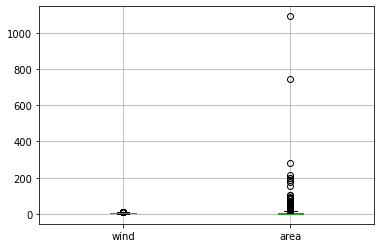

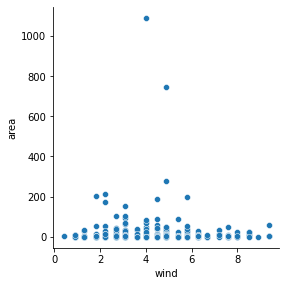

In [256]:
# pre plotting 
# understanding distribution of values

df.boxplot(column=['wind', 'area'])
sbn.pairplot(df, x_vars=['wind'], y_vars='area', height=4, aspect=1, kind='scatter')
plt.show()

In [257]:
#reshape an array by adding an extra dimension
x = np.c_[df['wind']]
y = np.c_[df['area']]

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1


(11.089101812334118, 0.43762185885285254)

**Linear Model :** Area = 11.089 + 0.437 * wind

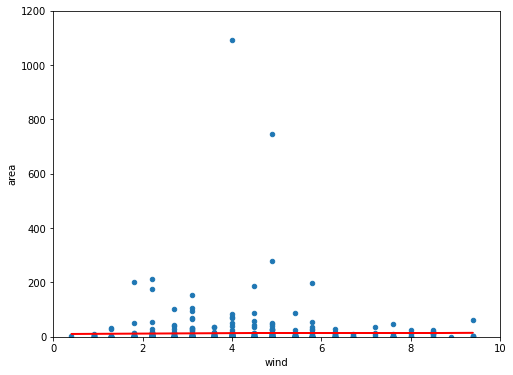

In [258]:
# plot the linear model
df.plot(kind='scatter', x='wind', y='area', figsize=(8, 6))

plt.axis([0, 10, 0, 1200])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [259]:
# splitting the data into training and testing sets
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [260]:
# 80% of 516 cases are used for training now
x_train.shape

(413, 1)

In [261]:
# 20% of 516 cases are set aside for testing
x_test.shape

(104, 1)

In [262]:
# Fit the model using .fit() method
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [11.94571583]
Slope : [[0.44053305]]


In [263]:
#  evaluate the model using the R² and MSE values

from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)


print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.021974822191322962
Mean squared error: 863.4000453789413


**Problem Statement :**

- Create a simple linear regression model to understand the relationship between Area (the burned area of the forest) and the attribute RH.
- Plot the 2D data (scatter plot) along with the discovered model
- Use the 80-20 holdout technique to test the validity of the model and report on the obtained R2 and MSE values


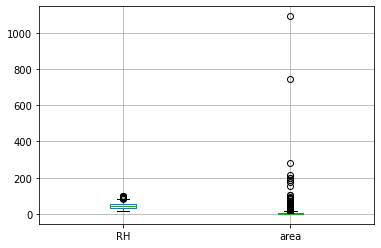

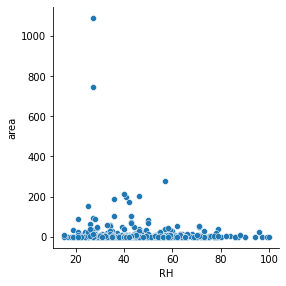

In [264]:
# pre plotting 
# understanding distribution of values
df.boxplot(column=['RH', 'area'])
sbn.pairplot(df, x_vars=['RH'], y_vars='area', height=4, aspect=1, kind='scatter')
plt.show()

In [265]:
#reshape an array by adding an extra dimension
x = np.c_[df['RH']]
y = np.c_[df['area']]

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1


(25.894784845023256, -0.2946042610331932)

**Linear Model:** Area = 25.894 - 0.29 * RH

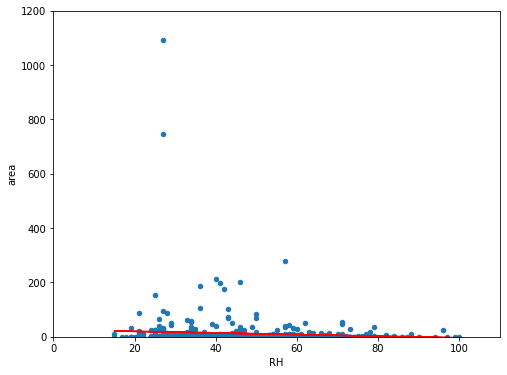

In [266]:
# plot the linear model
df.plot(kind='scatter', x='RH', y='area', figsize=(8, 6))

plt.axis([0, 110, 0, 1200])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [267]:
# splitting the data into training and testing sets
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [268]:
# 80% of 516 cases are used for training now
x_train.shape

(413, 1)

In [269]:
# 20% of 516 cases are set aside for testing
x_test.shape

(104, 1)

In [270]:
# Fit the model using .fit() method
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [29.37563009]
Slope : [[-0.35699106]]


In [271]:
#  evaluate the model using the R² and MSE values

from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)


print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.04845187467769896
Mean squared error: 885.7687846295037


**Problem Statement :**

- Create a simple linear regression model to understand the relationship between Area (the burned area of the forest) and the attribute Rain.
- Plot the 2D data (scatter plot) along with the discovered model
- Use the 80-20 holdout technique to test the validity of the model and report on the obtained R2 and MSE values

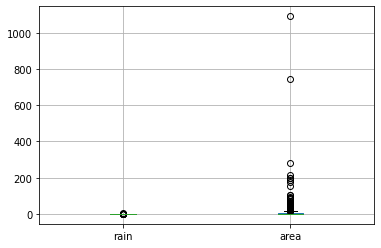

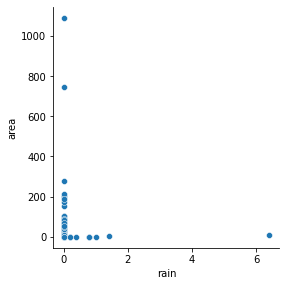

In [272]:
# pre plotting 
# understanding distribution of values
df.boxplot(column=['rain', 'area'])
sbn.pairplot(df, x_vars=['rain'], y_vars='area', height=4, aspect=1, kind='scatter')
plt.show()

In [273]:
#reshape an array by adding an extra dimension
x = np.c_[df['rain']]
y = np.c_[df['area']]

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(12.881612253841306, -1.5842442174960942)

**Linear Model:** Area = 12.882 - 1.584 * rain

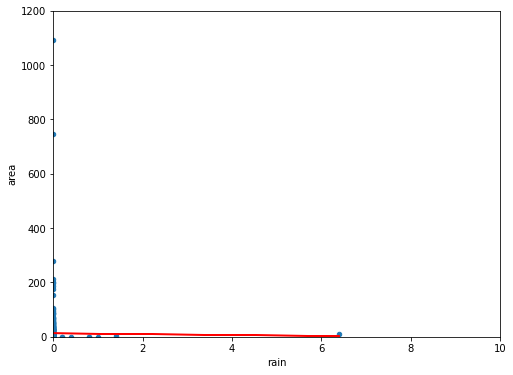

In [274]:
# plot the  linear model
df.plot(kind='scatter', x='rain', y='area', figsize=(8, 6))

plt.axis([0, 10, 0, 1200])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [275]:
# splitting the data into training and testing sets
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [276]:
# 80% of 516 cases are used for training now
x_train.shape

(413, 1)

In [277]:
# 20% of 516 cases are set aside for testing
x_test.shape


(104, 1)

In [278]:
# Fit the model using .fit() method
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [13.77120025]
Slope : [[-1.62884002]]


In [279]:
#  evaluate the model using the R² and MSE values

from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)


print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.02289617576001013
Mean squared error: 864.1784370728861


Tabulate results obtained by comparing regression accuracies of the four models 

         

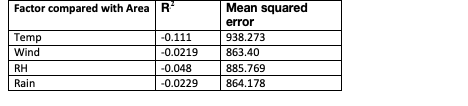

Looking at the above table we infer that Wind and Rain provide almost similar accuracy for predicting the area burned in fire which is better than RH and Temp. Temp provides the least accurate way of predicting burned area .